In [ ]:
# TITLE --- Analysis of Beyonce Songs

In [ ]:
# NAME OF MEMBERS INCLUDED
# ...............................
# 1.Name - Ayush Kumar Jha
# E-mail - ayush.jha01@gmail.com
# ...............................
# 2.Name - Adarsh Priydarshi
# E-mail - adarsh.Priydarshi01@adypu.edu.in
# ...............................
# 3.Name - Ritik Anand
# E-mail - ritik.anand@adypu.edu.in
# ...............................
# 4.Name - Mayank Choudhary
# E-mail - mayank.choudhary@adypu.edu.in
# ...............................

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
from collections import Counter
import re

In [ ]:
from google.colab import files
uploaded = files.upload()



In [ ]:
df = pd.read_csv("Beyonce.csv")


In [ ]:
# Clean and parse dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Year'].astype('Int64')

In [ ]:
# -------------------------------
# 1. EDA with Data Visualisation
# -------------------------------

In [ ]:
# Missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Unnamed: 0      0
Artist          0
Title           0
Album          96
Year          135
Date          135
Lyric           0
dtype: int64


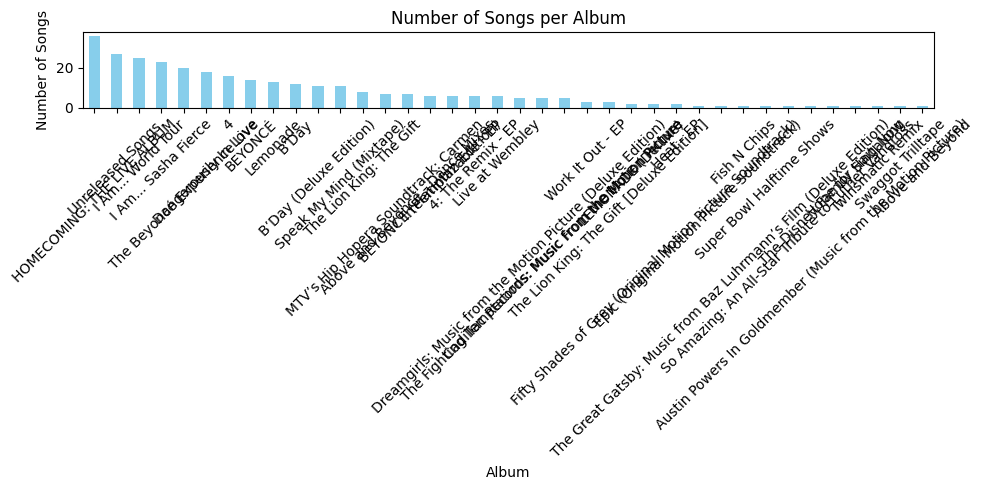

In [ ]:
# Songs per Album
plt.figure(figsize=(10, 5))
df['Album'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Songs per Album')
plt.ylabel('Number of Songs')
plt.xlabel('Album')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

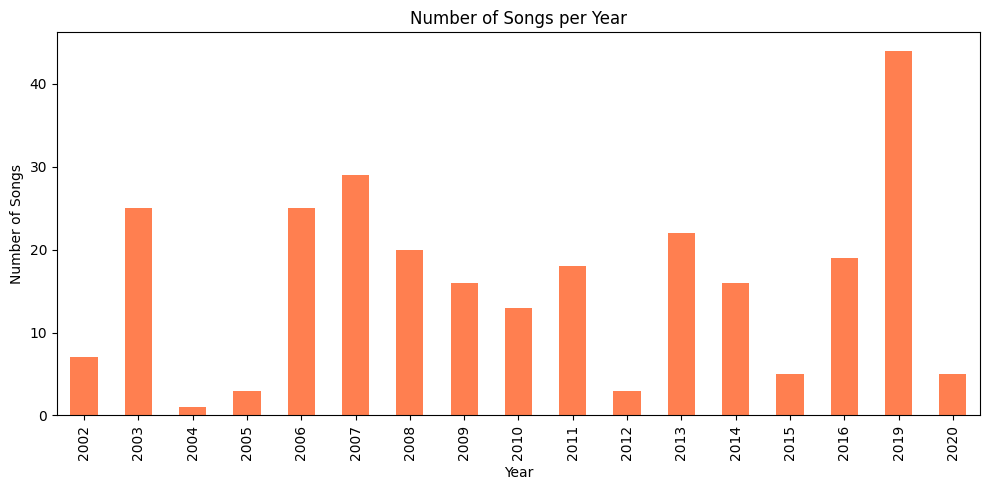

In [ ]:
# Song per Year
plt.figure(figsize=(10, 5))
df['Year'].dropna().astype(int).value_counts().sort_index().plot(kind='bar', color='coral')
plt.title('Number of Songs per Year')
plt.ylabel('Number of Songs')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

In [ ]:
# Add word count column
df['WordCount'] = df['Lyric'].apply(lambda x: len(str(x).split()))

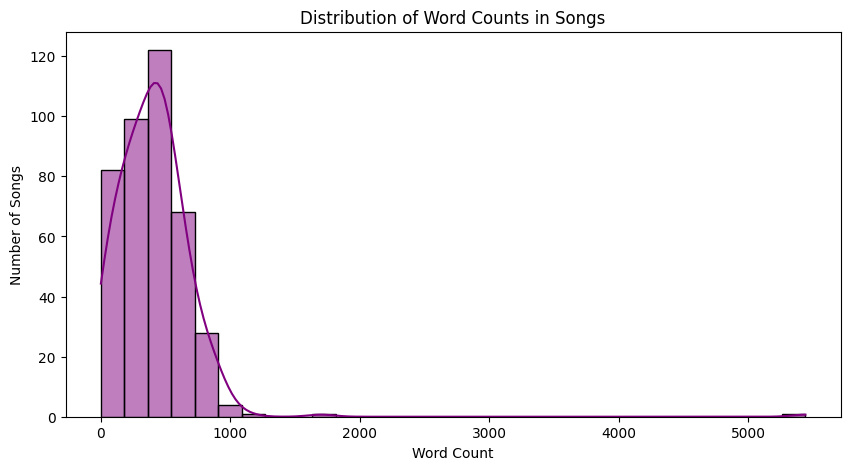

In [ ]:
# Word count distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['WordCount'], bins=30, kde=True, color='purple')
plt.title('Distribution of Word Counts in Songs')
plt.xlabel('Word Count')
plt.ylabel('Number of Songs')
plt.show()


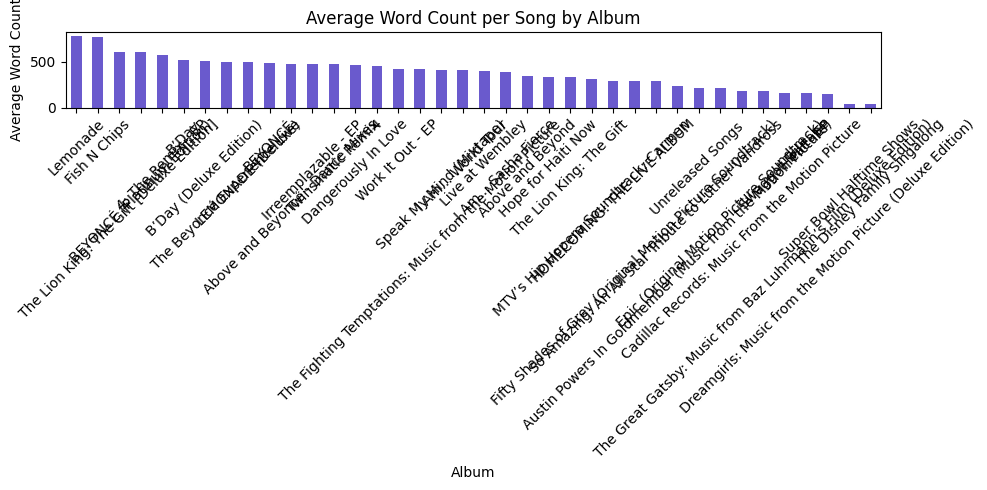

In [ ]:
# Average word count per album
avg_words_album = df.groupby('Album')['WordCount'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
avg_words_album.plot(kind='bar', color='slateblue')
plt.title('Average Word Count per Song by Album')
plt.ylabel('Average Word Count')
plt.xlabel('Album')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

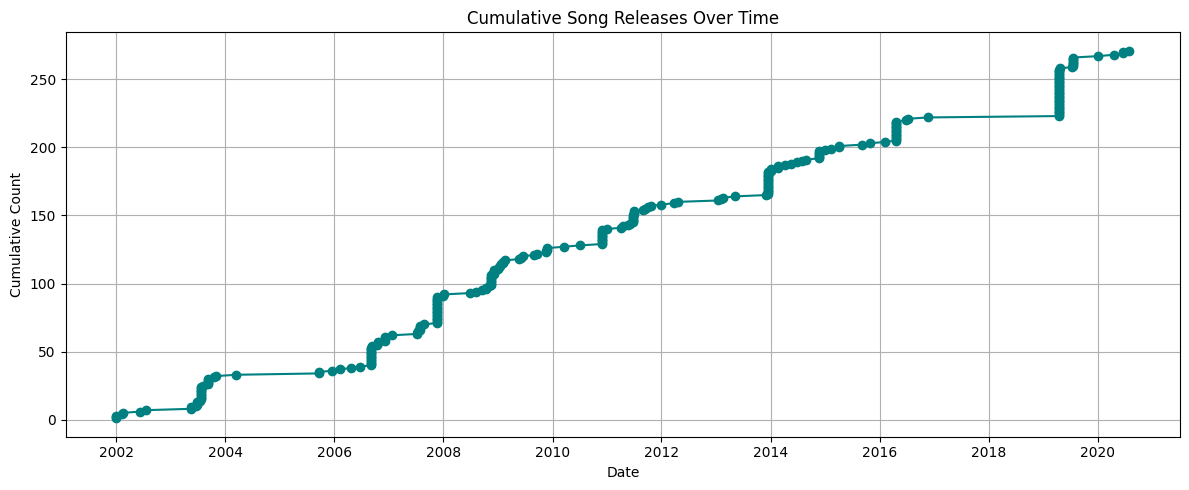

In [ ]:
# Song release timeline
plt.figure(figsize=(12, 5))
df_sorted = df.dropna(subset=['Date']).sort_values('Date')
df_sorted['RollingCount'] = range(1, len(df_sorted) + 1)
plt.plot(df_sorted['Date'], df_sorted['RollingCount'], marker='o', linestyle='-', color='teal')
plt.title('Cumulative Song Releases Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Top 10 longest songs by word count
top_longest = df[['Title', 'WordCount']].sort_values(by='WordCount', ascending=False).head(10)
print("\nTop 10 Longest Songs by Word Count:")
print(top_longest)


Top 10 Longest Songs by Word Count:
                                       Title  WordCount
36                    Lemonade Film (Script)       5442
251                       Beyoncé VMA’s 2014       1704
253          Get Me Bodied (Timbaland Remix)       1123
358  Get Me Bodied (Beyoncé Experience Live)       1000
261                   Destiny’s Child Medley        973
313                     Get Me Bodied (Live)        971
118             Get Me Bodied (Extended Mix)        971
3                                       Mine        890
22                     Drunk in Love (Remix)        878
37                                 Upgrade U        877


In [ ]:
# Top 10 shortest songs by word count
top_shortest = df[['Title', 'WordCount']].sort_values(by='WordCount', ascending=True).head(10)
print("\nTop 10 Shortest Songs by Word Count:")
print(top_shortest)



Top 10 Shortest Songs by Word Count:
                           Title  WordCount
398                      Royalty          2
402         Black Parade (Remix)         10
311        Intro (Speak My Mind)         10
193  ​come home (nala interlude)         13
346                        Intro         16
270                         LIFE         17
343        Outro (Speak My Mind)         17
257                      Eclipse         18
403                    This Love         18
383                       Cherry         18


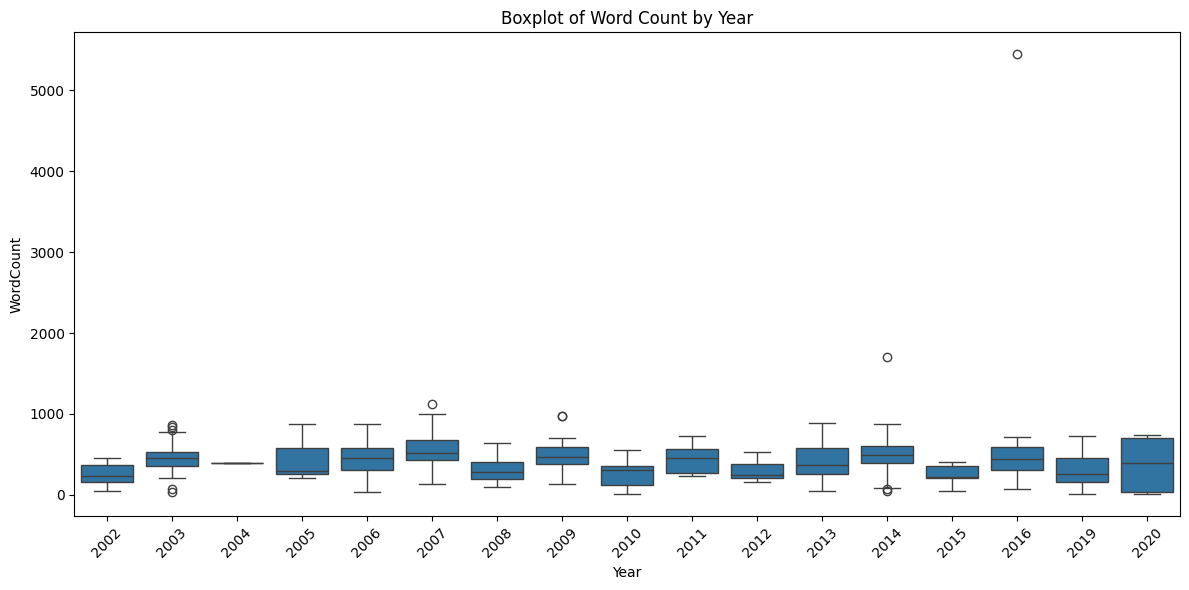

In [ ]:
# Distribution of word count per year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='WordCount', data=df)
plt.xticks(rotation=45)
plt.title('Boxplot of Word Count by Year')
plt.tight_layout()
plt.show()

In [ ]:
# If Genre column exists, plot songs per genre
if 'Genre' in df.columns:
    plt.figure(figsize=(10, 5))
    df['Genre'].value_counts().plot(kind='bar', color='darkorange')
    plt.title('Number of Songs per Genre')
    plt.ylabel('Number of Songs')
    plt.xlabel('Genre')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<ipython-input-28-cfe2442fd437>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popular_songs.sort_values('WordCount', ascending=False).head(10), x='WordCount', y='Title', palette='viridis')


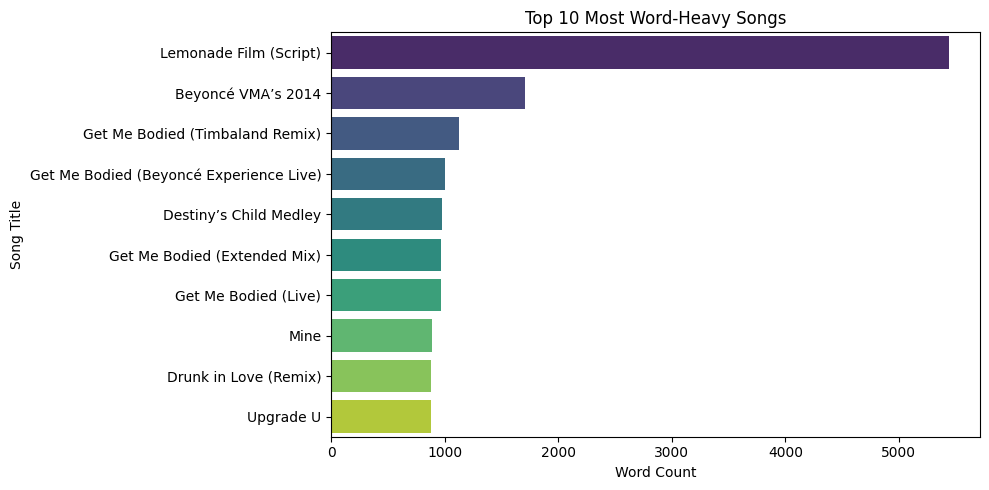

In [ ]:
# Filter: Popular songs (assuming popularity = high word count or from popular albums)
popular_songs = df[df['WordCount'] > df['WordCount'].quantile(0.90)]
plt.figure(figsize=(10, 5))
sns.barplot(data=popular_songs.sort_values('WordCount', ascending=False).head(10), x='WordCount', y='Title', palette='viridis')
plt.title('Top 10 Most Word-Heavy Songs')
plt.xlabel('Word Count')
plt.ylabel('Song Title')
plt.tight_layout()
plt.show()

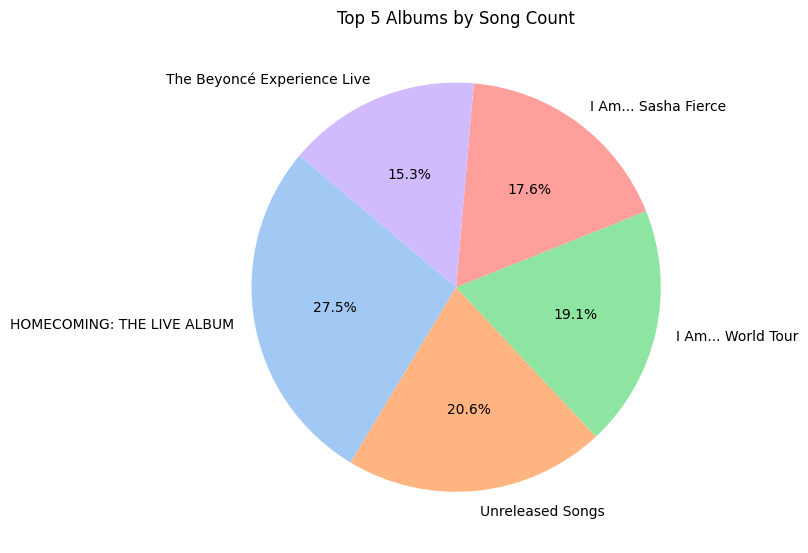

In [ ]:
# Top 5 albums with most songs (pie chart)
album_counts = df['Album'].value_counts().head(5)
plt.figure(figsize=(8, 8))
album_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 5 Albums by Song Count')
plt.ylabel('')
plt.tight_layout()
plt.show()

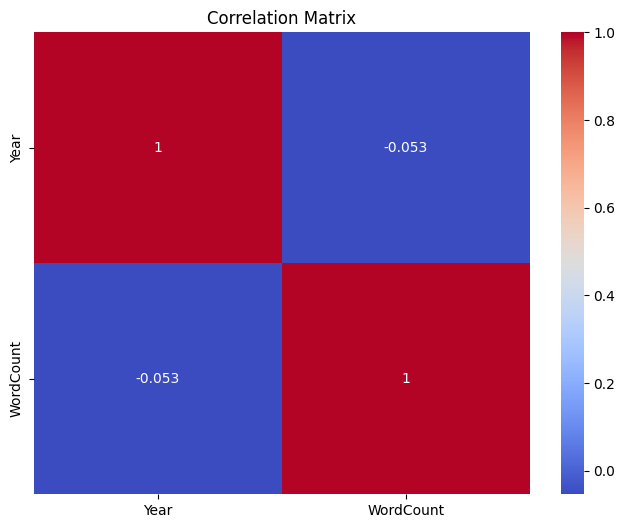

In [ ]:

# Heatmap of word count correlation with year and missing data
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Year', 'WordCount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:

# -------------------------------
# 2. Zipf's Law Analysis
# -------------------------------


In [ ]:
# Tokenize all lyrics and count word frequencies
all_lyrics = " ".join(df['Lyric'].dropna()).lower()
all_words = re.findall(r'\b\w+\b', all_lyrics)
word_counts = Counter(all_words)

In [ ]:
# Rank and plot
sorted_counts = sorted(word_counts.values(), reverse=True)
ranks = range(1, len(sorted_counts) + 1)

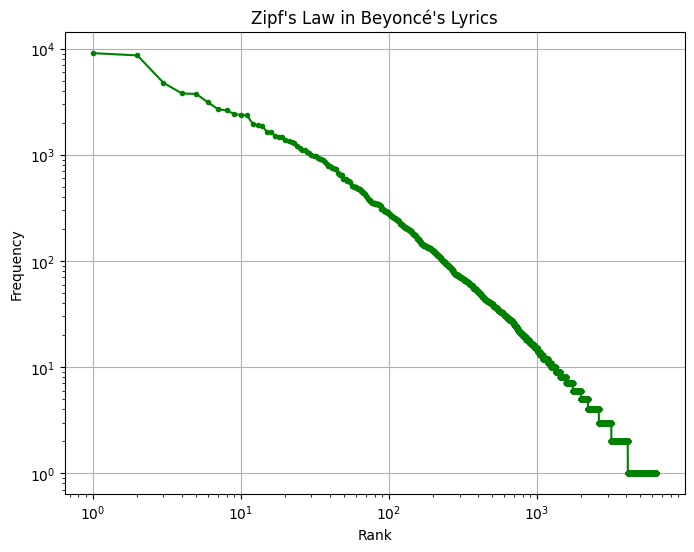

In [ ]:
plt.figure(figsize=(8, 6))
plt.loglog(ranks, sorted_counts, marker=".", color='green')
plt.title("Zipf's Law in Beyoncé's Lyrics")
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

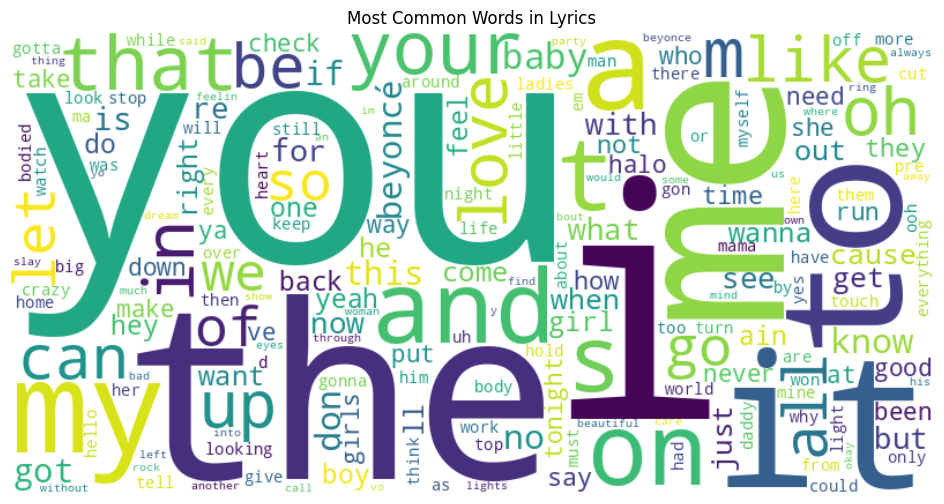

In [ ]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Lyrics")
plt.show()

In [ ]:
# -------------------------------
# 3. Insights Section
# -------------------------------

In [ ]:
# Insight 1: Most active year
most_active_year = df['Year'].value_counts().idxmax()
print(f"Most songs were released in the year: {most_active_year}")


Most songs were released in the year: 2019


In [ ]:
# Insight 2: Album with most songs
top_album = df['Album'].value_counts().idxmax()
print(f"Album with the most songs: {top_album}")

Album with the most songs: HOMECOMING: THE LIVE ALBUM


In [ ]:
# Insight 3: Most common words
print("Top 10 most common words:")
print(word_counts.most_common(10))

In [ ]:
# Insight 4: Zipf's law pattern confirms human language distribution
print("Word frequency follows Zipf's Law — a few words occur very frequently, many occur rarely.")

Word frequency follows Zipf's Law — a few words occur very frequently, many occur rarely.


In [ ]:
# Insight 5: Songs with no album/year info could be singles, collabs or unreleased
missing_album = df['Album'].isnull().sum()
missing_year = df['Year'].isnull().sum()
print(f"{missing_album} songs have no album info; {missing_year} songs have no year info.")

96 songs have no album info; 135 songs have no year info.
